In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/drive/MyDrive/learning/computer_vision/basic/image/dog.jpg")

In [ ]:
img.shape

(580, 580, 3)

In [ ]:
## Dilation = Adds pixels to the boundaries of objects in an image
## Erosion = Removes pixels at the boundaries of objects in an image
## Opening = Erosion followed by dilation
## Closing = Dilation followed by erosion

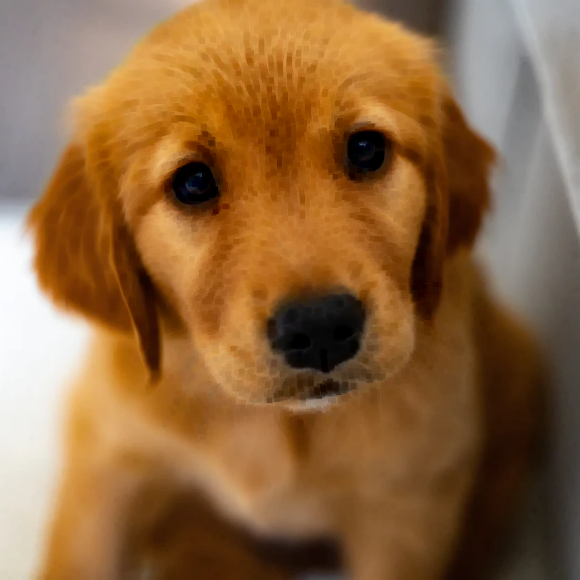

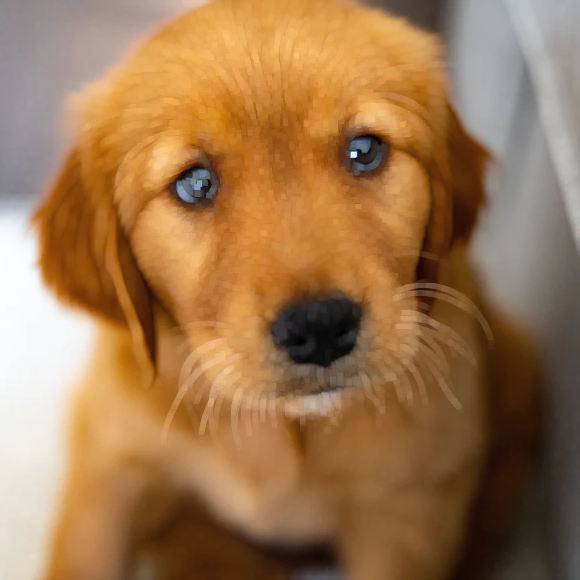

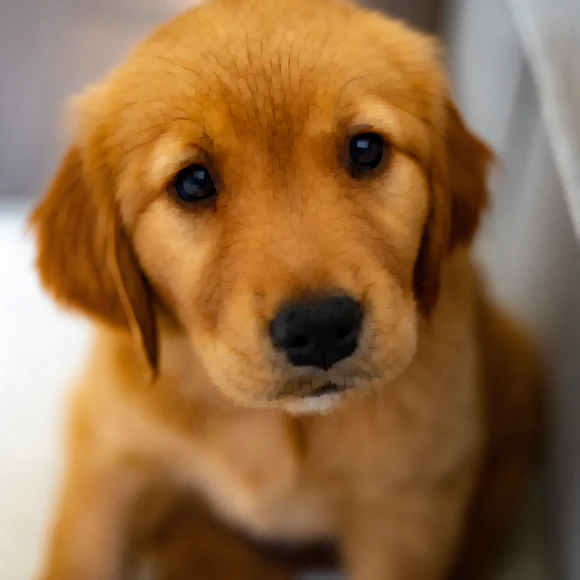

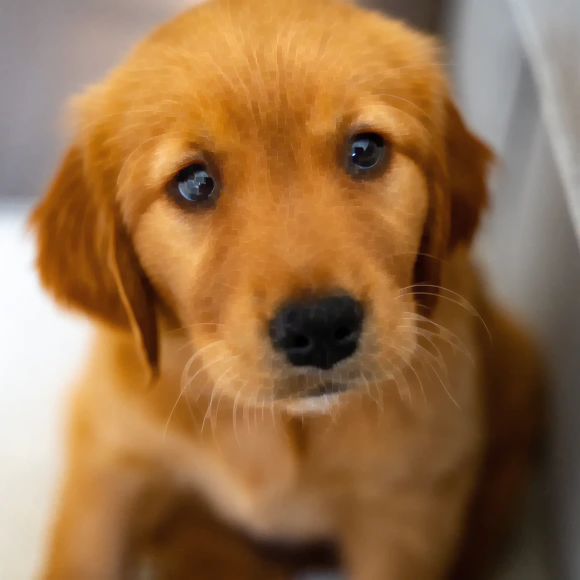

In [ ]:
# Let's define our kernel size
kernel = np.ones((5, 5), np.uint8)

# Now we erode
erosion = cv2.erode(img, kernel, iterations = 1)
cv2_imshow(erosion)


# Dilate here
dilation = cv2.dilate(img, kernel, iterations = 1)
cv2_imshow(dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

In [ ]:
## The first argument is out input image
## The second and third arguments are minVal and maxVal respectively
## The fourth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

## Edge detection needs a threshold to tell what difference / change should be counted as edge

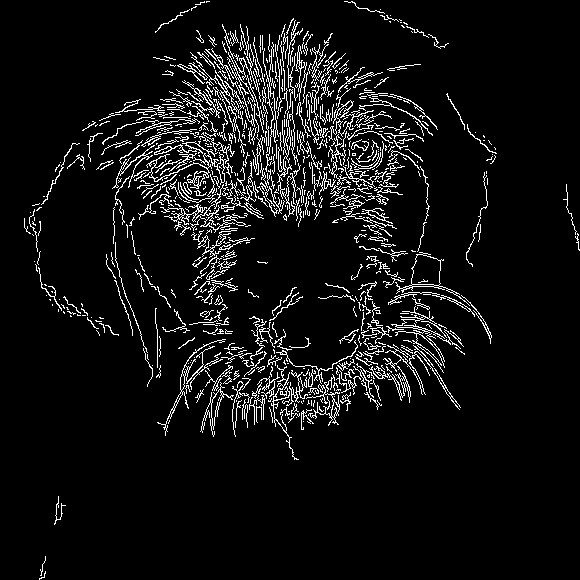

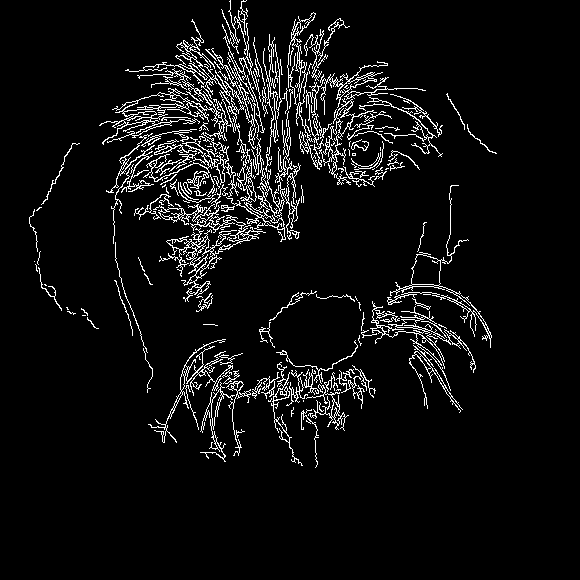

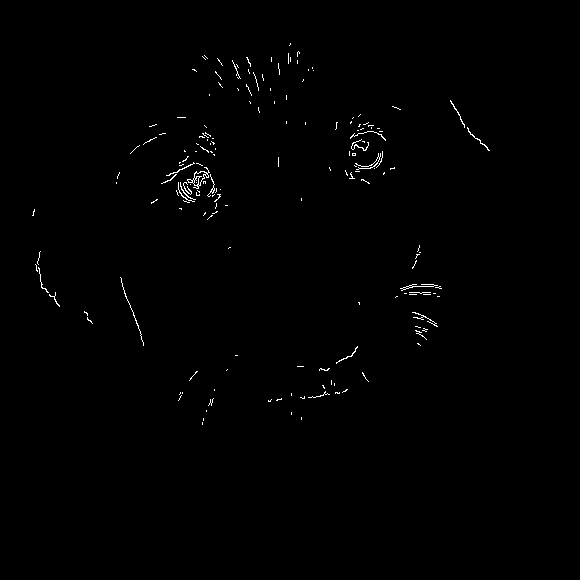

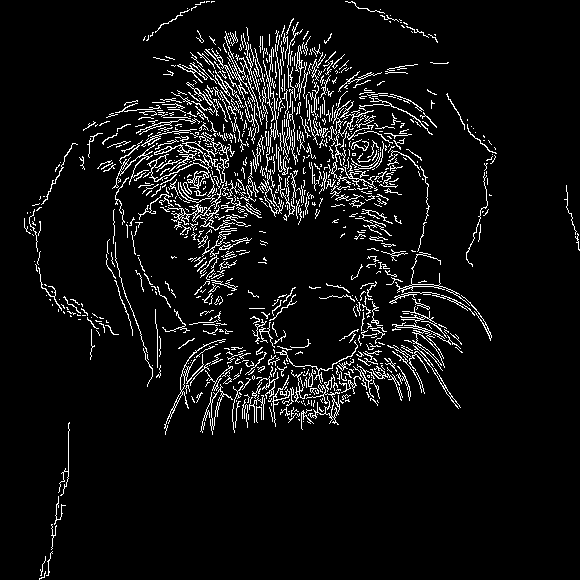

In [ ]:
## Canny Edge Detection used gradient values as threholds
## The first threshold gradient
canny = cv2.Canny(img, 50, 120)
cv2_imshow(canny)

## Wide edge thresholds expect lots of edges
canny2 = cv2.Canny(img, 10, 200)
cv2_imshow(canny2)

## Narrow threshold, expect less edges
canny3 = cv2.Canny(img, 200, 240)
cv2_imshow(canny3)

canny4 = cv2.Canny(img, 60, 110)
cv2_imshow(canny4)


##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

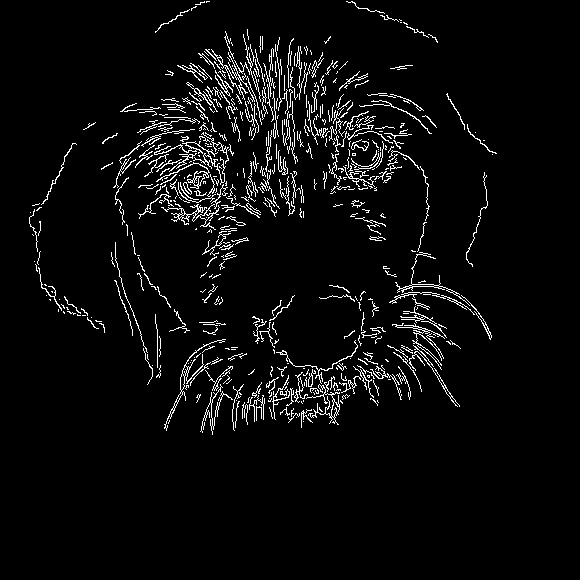

In [ ]:
## Auto Canny

def autoCanny(img):
    # finds optimal thresholds based on median image pixel intensity
    blurred_img = cv2.blur(img, ksize = (5, 5))
    med_val = np.median(img)
    lower = int(max(0, 0.66 * med_val))
    upper = int(min(255, 1.33 * med_val))
    edges = cv2.Canny(image = img, threshold1 = lower, threshold2 = upper)
    return edges

auto_canny = autoCanny(img)
cv2_imshow(auto_canny)